In [2]:
import numpy as np
import pandas as pd
import tables
import h5py
import os
import fnmatch

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession, Row
from pyspark import SparkContext
from pyspark.sql.types import *

#### Connection to spark cluster: 

In [3]:
spark = SparkSession.builder.appName("Milion Songs Dataset").getOrCreate()
sc = SparkContext.getOrCreate()

#### path to datasets: 
- Subset of MSD 
- Triplet of user, songs and number of plays 

In [8]:
db_path = 'MillionSongSubset'
triplet = 'train_triplets/train_triplets.txt'

## Read the subset of MSD dataset from HDF5 directories: 

- In order to read HDF5 file, HDFStore function of pandas library is used to read the dataset and store as pandas dataframe
- To read the dataset, it should check all sub-directories and read .h5 files. 
- Each file contains three keys <b>'/analysis/songs/'<b/>, '/metadata/songs/', '/musicbrainz/songs/'
- Each key allow us to access data and metadata stored in the dataset 

In [9]:
df = pd.DataFrame()
for path,_,filename in os.walk(db_path):
    for filename in fnmatch.filter(filename, '*.h5'):
        hdf = pd.HDFStore(os.path.join(path, filename),mode ='r')
        df1 = hdf.get('/analysis/songs/')
        df2 = hdf.get('/metadata/songs/')
        df3 = hdf.get('/musicbrainz/songs/')
        df_concat = pd.concat([df1,df2,df3], axis = 1)
        df = pd.concat([df,df_concat], ignore_index=True)
        hdf.close()

## Overview of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   analysis_sample_rate            10000 non-null  int32  
 1   audio_md5                       10000 non-null  object 
 2   danceability                    10000 non-null  float64
 3   duration                        10000 non-null  float64
 4   end_of_fade_in                  10000 non-null  float64
 5   energy                          10000 non-null  float64
 6   idx_bars_confidence             10000 non-null  int32  
 7   idx_bars_start                  10000 non-null  int32  
 8   idx_beats_confidence            10000 non-null  int32  
 9   idx_beats_start                 10000 non-null  int32  
 10  idx_sections_confidence         10000 non-null  int32  
 11  idx_sections_start              10000 non-null  int32  
 12  idx_segments_confidence         1

In [11]:
df.describe(include='all', percentiles=[0.5]).T

,count,unique,top,freq,mean,std,min,50%,max
analysis_sample_rate,10000.0,NaN,NaN,NaN,22050.0,0.0,22050.0,22050.0,22050.0
audio_md5,10000,9999,b1b14821ff71f009742cddcbc4b6c997,2,NaN,NaN,NaN,NaN,NaN
danceability,10000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
duration,10000.0,NaN,NaN,NaN,238.507518,114.137514,1.04444,223.05914,1819.76771
end_of_fade_in,10000.0,NaN,NaN,NaN,0.758616,1.867952,0.0,0.199,43.119
energy,10000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
idx_bars_confidence,10000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
idx_bars_start,10000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
idx_beats_confidence,10000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
idx_beats_start,10000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [12]:
df.head(3).T

,0,1,2
analysis_sample_rate,22050,22050,22050
audio_md5,a222795e07cd65b7a530f1346f520649,bb9771eeef3d5b204a3c55e690f52a91,fa329738005ca53715d9f7381a0d1fe3
danceability,0.0,0.0,0.0
duration,218.93179,148.03546,177.47546
end_of_fade_in,0.247,0.148,0.282
energy,0.0,0.0,0.0
idx_bars_confidence,0,0,0
idx_bars_start,0,0,0
idx_beats_confidence,0,0,0
idx_beats_start,0,0,0


## Extracting following attributes: 
- song_id
- title
- artist_id
- duration
- Key: the key of a song is the note or chord the music is centered around
- loudness
- mode: major or minor (0 or 1)
- tempo: speed of a song 
- time_signature: number of beats per second 
- song_hotttnesss
- artist_hotttnesss
- artist_familiarity
- artist_location
- year 

(More details of attributes http://millionsongdataset.com/pages/field-list/)

#### Note: 
For each artist_id, there are some tags stored as artist_term which can be read from database in case we need it. For now, we stick to these attributes for the content-based recommendation system.

In [13]:
attrbs=['song_id',
        'title', 
        'artist_id', 
        'duration',
        'key', 
        'loudness',
        'mode',
        'tempo',
        'time_signature',
        'song_hotttnesss', 
        'artist_hotttnesss', 
        'artist_familiarity', 
        'artist_location', 
        'year']

In [14]:
df1 = df[attrbs]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             10000 non-null  object 
 1   title               10000 non-null  object 
 2   artist_id           10000 non-null  object 
 3   duration            10000 non-null  float64
 4   key                 10000 non-null  int32  
 5   loudness            10000 non-null  float64
 6   mode                10000 non-null  int32  
 7   tempo               10000 non-null  float64
 8   time_signature      10000 non-null  int32  
 9   song_hotttnesss     5648 non-null   float64
 10  artist_hotttnesss   10000 non-null  float64
 11  artist_familiarity  9996 non-null   float64
 12  artist_location     10000 non-null  object 
 13  year                10000 non-null  int32  
dtypes: float64(6), int32(4), object(4)
memory usage: 937.6+ KB


In [16]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_id,10000,10000,SOMZWCG12A8C13C480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,10000,9709,Intro,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_id,10000,3888,AROIHOI122988FEB8E,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,10000.0,NaN,NaN,NaN,238.507518,114.137514,1.04444,176.0322,223.05914,276.37506,1819.76771
key,10000.0,NaN,NaN,NaN,5.2761,3.554087,0.0,2.0,5.0,8.0,11.0
loudness,10000.0,NaN,NaN,NaN,-10.485669,5.399788,-51.643,-13.16325,-9.38,-6.5325,0.566
mode,10000.0,NaN,NaN,NaN,0.6911,0.462063,0.0,0.0,1.0,1.0,1.0
tempo,10000.0,NaN,NaN,NaN,122.915449,35.184412,0.0,96.96575,120.161,144.01325,262.828
time_signature,10000.0,NaN,NaN,NaN,3.5648,1.266239,0.0,3.0,4.0,4.0,7.0
song_hotttnesss,5648.0,NaN,NaN,NaN,0.342822,0.24722,0.0,0.0,0.360371,0.537504,1.0


In [17]:
df1.head().T

,0,1,2,3,4
song_id,SOMZWCG12A8C13C480,SOCIWDW12A8C13D406,SOXVLOJ12AB0189215,SONHOTT12A8C13493C,SOFSOCN12A8C143F5D
title,I Didn't Mean To,Soul Deep,Amor De Cabaret,Something Girls,Face the Ashes
artist_id,ARD7TVE1187B99BFB1,ARMJAGH1187FB546F3,ARKRRTF1187B9984DA,AR7G5I41187FB4CE6C,ARXR32B1187FB57099
duration,218.93179,148.03546,177.47546,233.40363,209.60608
key,1,6,8,0,2
loudness,-11.197,-9.843,-9.689,-9.013,-4.501
mode,0,0,1,1,1
tempo,92.198,121.274,100.07,119.293,129.738
time_signature,4,4,1,4,4
song_hotttnesss,0.60212,NaN,NaN,NaN,0.604501


<AxesSubplot:>

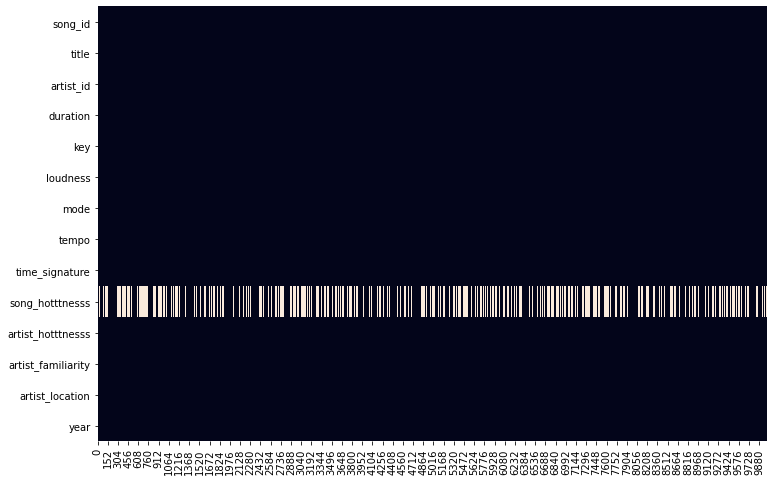

In [18]:
fig, ax = plt.subplots(figsize=(12,8))         
sns.heatmap(df1.isnull().T, cbar=False,ax=ax )

This figure is not reliable because some missing values are not considered(like missing 'year' is 0 not None). 
To have better understanding of the data we should preprocess the data. 

### creating an spark dataframe of the pandas dataframe

In [32]:
schema = StructType([
    StructField('song_id', StringType(), True),
    StructField('title', StringType(), True),
    StructField('artist_id', StringType(), True),
    StructField('duration', FloatType(), True),
    StructField('key', IntegerType(), True),
    StructField('loudness', FloatType(), True),
    StructField('mode', IntegerType(), True),
    StructField('tempo', FloatType(), True),
    StructField('time_signature', IntegerType(), True),
    StructField('song_hotttnesss', FloatType(), True),
    StructField('artist_hotttnesss', FloatType(), True),
    StructField('artist_familiarity', FloatType(), True),
    StructField('artist_location', StringType(), True),
    StructField('year', IntegerType(), False)])
df_contentDS = spark.createDataFrame(df1, schema)
df_contentDS.describe()

DataFrame[summary: string, song_id: string, title: string, artist_id: string, duration: string, key: string, loudness: string, mode: string, tempo: string, time_signature: string, song_hotttnesss: string, artist_hotttnesss: string, artist_familiarity: string, artist_location: string, year: string]

In [39]:
df_contentDS.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_id,10000,10000,SOMZWCG12A8C13C480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,10000,9709,Intro,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_id,10000,3888,AROIHOI122988FEB8E,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,10000.0,NaN,NaN,NaN,238.507278,114.137314,1.04444,176.032196,223.059143,276.375061,1819.7677
key,10000.0,NaN,NaN,NaN,5.2761,3.554087,0.0,2.0,5.0,8.0,11.0
loudness,10000.0,NaN,NaN,NaN,-10.485654,5.399786,-51.643002,-13.16325,-9.38,-6.5325,0.566
mode,10000.0,NaN,NaN,NaN,0.6911,0.462063,0.0,0.0,1.0,1.0,1.0
tempo,10000.0,NaN,NaN,NaN,122.915512,35.184418,0.0,96.965752,120.161003,144.013245,262.828003
time_signature,10000.0,NaN,NaN,NaN,3.5648,1.266239,0.0,3.0,4.0,4.0,7.0
song_hotttnesss,5648.0,NaN,NaN,NaN,0.342822,0.247218,0.0,0.0,0.360371,0.537504,1.0


### Load User-Items(Music) dataset: 

In [51]:
# define schema, nullable is set true
scma = StructType([
    StructField('userId', StringType(), True),
    StructField('songId', StringType(), True),
    StructField('play_count', IntegerType(), True)])

In [54]:
# read the file as a csv file which each coloumn is divided by a tab(in spark dataframe)
df_users = spark.read.option("delimiter", "\t").schema(scma).csv(triplet) 

In [56]:
df_users.columns

['userId', 'songId', 'play_count']

In [57]:
df_users.describe().show()

+-------+--------------------+------------------+-----------------+
|summary|              userId|            songId|       play_count|
+-------+--------------------+------------------+-----------------+
|  count|            48373586|          48373586|         48373586|
|   mean|                null|              null|2.866858847305635|
| stddev|                null|              null|6.437724686877057|
|    min|00000b72200188206...|SOAAADD12AB018A9DD|                1|
|    max|fffff9534445f481b...|SOZZZWN12AF72A1E29|             9667|
+-------+--------------------+------------------+-----------------+



In [58]:
df_users.head(5)

[Row(userId='b80344d063b5ccb3212f76538f3d9e43d87dca9e', songId='SOAKIMP12A8C130995', play_count=1),
 Row(userId='b80344d063b5ccb3212f76538f3d9e43d87dca9e', songId='SOAPDEY12A81C210A9', play_count=1),
 Row(userId='b80344d063b5ccb3212f76538f3d9e43d87dca9e', songId='SOBBMDR12A8C13253B', play_count=2),
 Row(userId='b80344d063b5ccb3212f76538f3d9e43d87dca9e', songId='SOBFNSP12AF72A0E22', play_count=1),
 Row(userId='b80344d063b5ccb3212f76538f3d9e43d87dca9e', songId='SOBFOVM12A58A7D494', play_count=1)]

In [60]:
df_users.show(2)

+--------------------+------------------+----------+
|              userId|            songId|play_count|
+--------------------+------------------+----------+
|b80344d063b5ccb32...|SOAKIMP12A8C130995|         1|
|b80344d063b5ccb32...|SOAPDEY12A81C210A9|         1|
+--------------------+------------------+----------+
only showing top 2 rows



# Data Preprocessing:

- removing songs played by user which are not in the subset of Million Song Dataset(from df-users dataframe)

### 1- Feature Selection: 

- Remove redundant and irrelevent features or combine and transform features(based on questions)

- Prunning and extrapolating MSD dataframe(df1)

### 2- Dealing with missing data:

- Do we need to rebalance dataset?(with oversampeling data)

### 3- Instance Selection and Prototyping:


### 4- Normalizing data: 

In [15]:
# from pyspark.ml.feature import MinMaxScaler

In [17]:
# scaler = MinMaxScaler(inputCol="play_count", outputCol="scaled")

In [24]:
# from pyspark.ml.feature import VectorAssembler, StandardScaler

In [25]:
# col = df_users.select("play_count")

In [42]:
#v_as = VectorAssembler(inputCols="play_count", outputCol="scaled_col")

In [43]:
#train = scaler.fit(col).transform(col)

In [44]:
# train.head(5)